date: 03/29/2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 10.2 (Bottom-Up) Hierarchical Clustering

    10.1.1 Hierarchical Clustering Step by Step
   
    10.1.2 Hierarchical Clustering Implementation
   
    10.1.3 Some Questions/Problems

Hierarchical Clustering is an alternative clustering algorithm to k-means.
This algorithm can capture complex cluster structures.
**But Hierarchical Clustering can only be used for relatively small datasets**.

**Hierarchical Clustering** works as follows:
    
   **step 1.** Make each input its own cluster of one.
   
   **step 2.** As long as there are multiple clusters remaining, choose two clusters and merge them.
    
If the algorithm is not stopped, at the end, we'll have one giant cluster containing all the inputs.

### 10.2.1 Hierarchical Clustering Step by Step

Let us consider the following small dataset

Text(0.5, 1.0, 'Three-small-clusters Dataset')

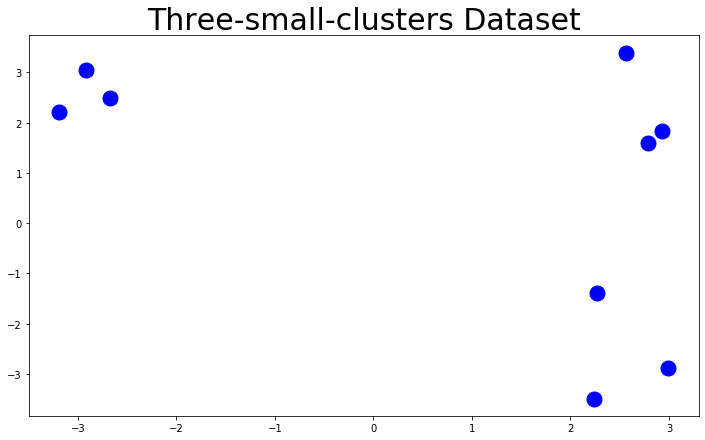

In [3]:
'A (tiny) dataset'
X = np.zeros((9,2)) #2 features; 9 data points
X[0:3] = .5*np.random.randn(3,2) + [-3,3] # blob 1; 3 points
X[3:6] = .5*np.random.randn(3,2) + [3,-3] # blob 2; 3 points
X[6:9] = .5*np.random.randn(3,2) + [3,3] # blob 3; 3 points


'plot dataset'
plt.figure(figsize=(12,7))
plt.plot(X[:,0],X[:,1],'bo',markersize=15)
plt.title('Three-small-clusters Dataset',fontsize=30)

We begin with every point in its own cluster.

In [4]:
'Make each point its own cluster of one'
k = X.shape[0] # number of clusters = number of data points
clusters = np.arange(k) #np.array([0,1,...,k-1])

Text(0.5, 1.0, 'Make each point its own cluster of one')

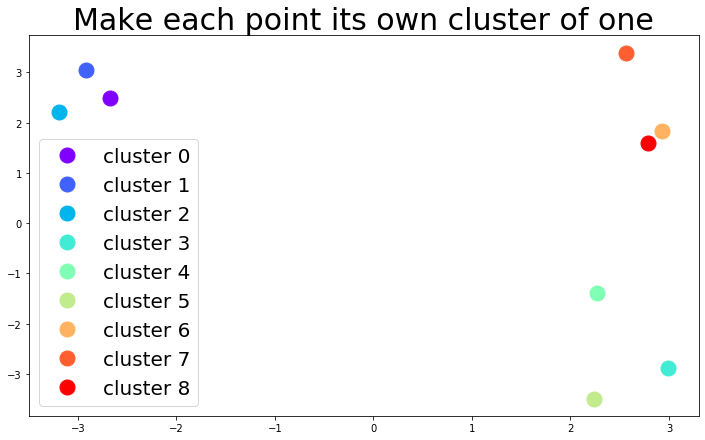

In [5]:
'plot the clusters'
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, k))
plt.figure(figsize=(12,7))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=1,markersize=15)
    plt.legend(fontsize=20, loc='lower left')
plt.title('Make each point its own cluster of one',fontsize=30)

As times goes on, larger clusters will be constructed by combining two small clusters. 
We have to decide how we will choose which two clusters to merge.
We will use the following rule:

**Merging rule:** merge the two closest clusters

We need to define intercluster distance. We have several options:
 
 1. The distance between two clusters is defined as the distance between their centers (means).
 
 2. The distance between two clusters is defined as the shortest distance between two points in each cluster.
 
 3. The  distance between two clusters is defined as the average distance between two points in each cluster
 
We'll implement the second.

In [6]:
'Intercluster distance function'
def cluster_distance_min(cluster1, cluster2):
    s1 = cluster1.shape[0] #size of cluster 1
    s2 = cluster2.shape[0] #size of cluster 2
    'compute all the pairwise distances between points in cluster1 and points in cluster2'
    distances = np.array([np.linalg.norm(cluster1[i]-cluster2[j]) for i in range(s1) for j in range(s2)])
    'return the minimum distance'
    return np.min(distances)

To decide which two clusters to merge, we need to compute all pairwise distances between any two clusters

In [8]:
D = np.zeros((k,k))
for i in range(k):
    for j in range(k):
        D[i,j]= cluster_distance_min(X[clusters==i],X[clusters==j])
np.fill_diagonal(D, np.inf) #set diagonal entries (distance from a cluster to itself) to infinity

Second, we need to find the closest clusters 

In [9]:
result = np.where(D==np.amin(D))
i,j = result[0][0],result[1][0]
i,j = np.where(D==np.amin(D))[0]
print('the closest clusters are cluster '+str(i)+' and cluster '+str(j))

the closest clusters are cluster 6 and cluster 8


Finally, we need to merge clusters i and j

In [10]:
clusters[clusters==j]=i

rename the clusters

In [11]:
for idx in range(j+1,k):
    clusters[clusters==idx]=idx-1
clusters

array([0, 1, 2, 3, 4, 5, 6, 7, 6])

and reduce number of clusters $k$ by 1

In [12]:
k = k-1
k

8

Let us plot the clusters. 
Notice that there is a cluster with two points.

Text(0.5, 1.0, '8 clusters')

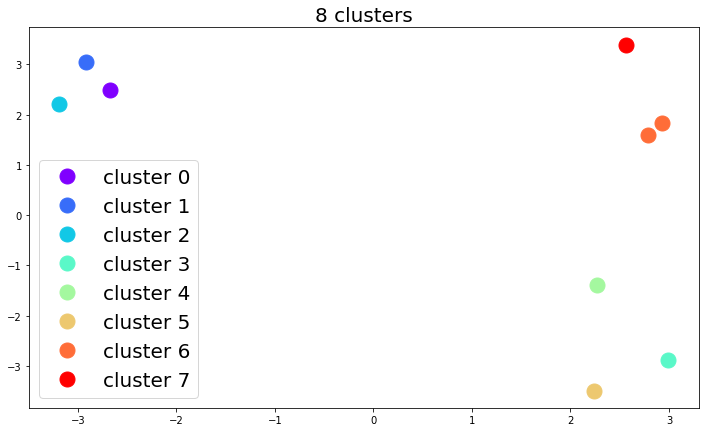

In [13]:
'plot the clusters'
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, k))
plt.figure(figsize=(12,7))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=1,markersize=15)
    plt.legend(fontsize=20, loc='lower left')
plt.title(str(k)+' clusters',fontsize=20)

We repeat this process until we have only one cluster

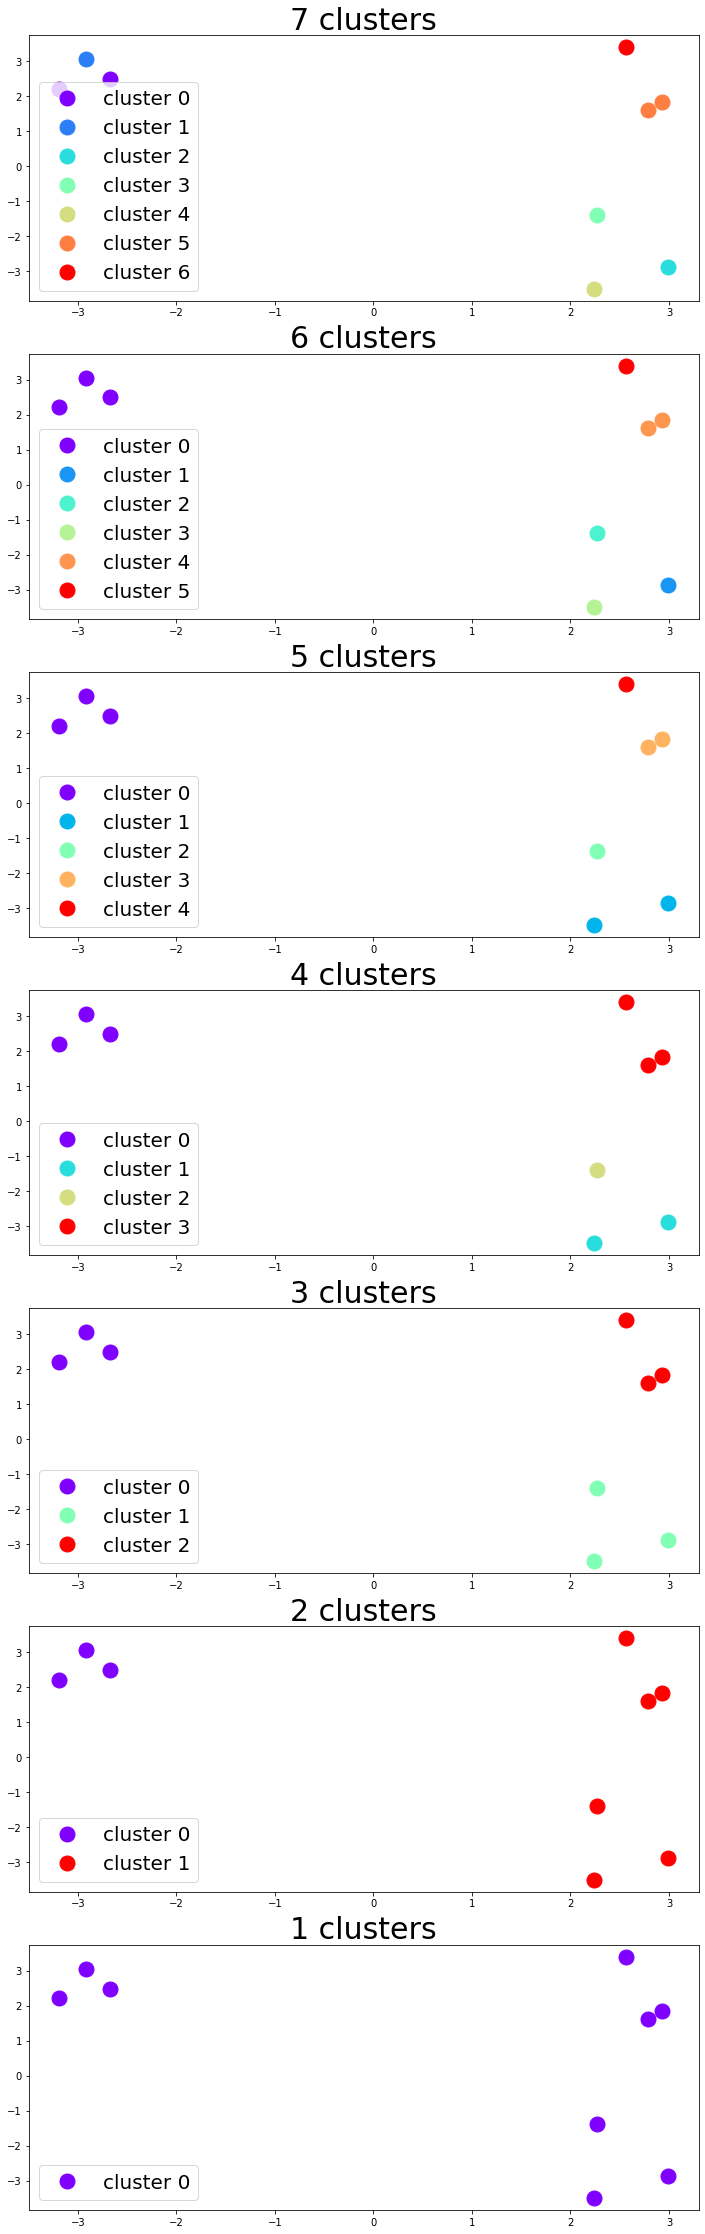

In [14]:
plt.figure(figsize=(12,40))
while k>1:
    'find nearest clusters'
    D = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            D[i,j]= cluster_distance_min(X[clusters==i],X[clusters==j])
    np.fill_diagonal(D, np.inf) #set diagonal entries to infinity
    i,j = result[0][0],result[1][0]
    i,j = np.where(D==np.amin(D))[0]

    'merge clusters'
    clusters[clusters==j]=i

    'rename clusters'
    for idx in range(j+1,k):
        clusters[clusters==idx]=idx-1
    clusters

    'reduce number of clusters'
    k = k-1

    'plot  clusters'
    import matplotlib.cm as cm
    colors = cm.rainbow(np.linspace(0, 1, k))
    plt.subplot(7,1,8-k)
    for i in range(k):
        'plot dataset points'
        plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=1,markersize=15)
        plt.legend(fontsize=20, loc='lower left')
    plt.title(str(k)+' clusters',fontsize=30)

### 10.2.2 Hierarchical Clustering Implementation

Hierarchical clustering is easy to implement naively.
We have to be careful to make it efficient.

In [15]:
def hierarchical_clustering(X,n_clusters=1):   
    
    m,n = X.shape #dataset size, number of features
    
    'Make each point its own cluster of one'
    k = m # number of clusters
    clusters = np.arange(k) 
    
    'distance between clusters initialization'
    distance_clusters = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            distance_clusters[i,j] = np.linalg.norm(X[i]-X[j]) # Euclidean distance between point i and point j
    np.fill_diagonal(distance_clusters, np.inf) #set diagonal entries to infinity
    
    'hierarchical clustering iteration'
    while k>n_clusters:     
        'find closest clusters'
        result = np.where(distance_clusters==np.amin(distance_clusters))
        i,j = result[0][0],result[1][0]
        i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
        
        'merge clusters i and j'
        clusters[clusters==j]=i
        
        'rename clusters'
        for idx in range(j+1,k):
            clusters[clusters==idx]=idx-1
            
        'recompute distance from the new cluster i to the remaining clusters'
        distance_clusters[i] = np.minimum(distance_clusters[i],distance_clusters[j]) # STUDENTS: do you see why this is the distance from the new cluster i to the other clusters?
        distance_clusters[:,i] = distance_clusters[i] # distance_clusters matrix is symmetric
        distance_clusters[i,i]= np.inf # set the distance from cluster i to itself to infinity
            
        'remove row j and column j from distance_clusters matrix'
        distance_clusters = np.delete(distance_clusters,j,0) # remove row j
        distance_clusters = np.delete(distance_clusters,j,1) # remove column j
              
        'update number of clusters'
        k = k - 1
   
    return clusters

Let us test our implementation of Hierarchical Clustering:

#### Test 1:  tiny dataset

Text(0.5, 1.0, 'Three-small-clusters Dataset')

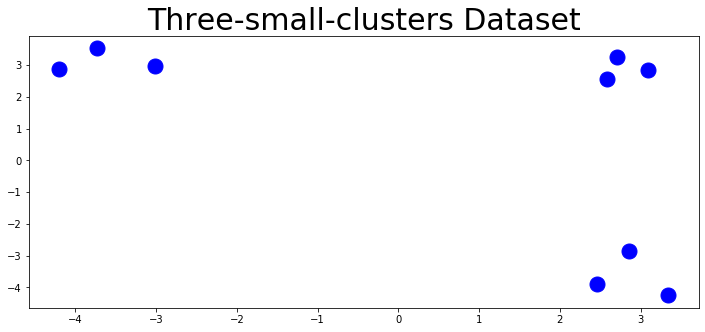

In [16]:
'A (tiny) dataset'
X = np.zeros((9,2)) #2 features; 9 data points
X[0:3] = .5*np.random.randn(3,2) + [-3,3] # blob 1; 3 points
X[3:6] = .5*np.random.randn(3,2) + [3,-3] # blob 2; 3 points
X[6:9] = .5*np.random.randn(3,2) + [3,3] # blob 3; 3 points


'plot dataset'
plt.figure(figsize=(12,5))
plt.plot(X[:,0],X[:,1],'bo',markersize=15)
plt.title('Three-small-clusters Dataset',fontsize=30)

Text(0.5, 1.0, 'Three-small-clusters Dataset')

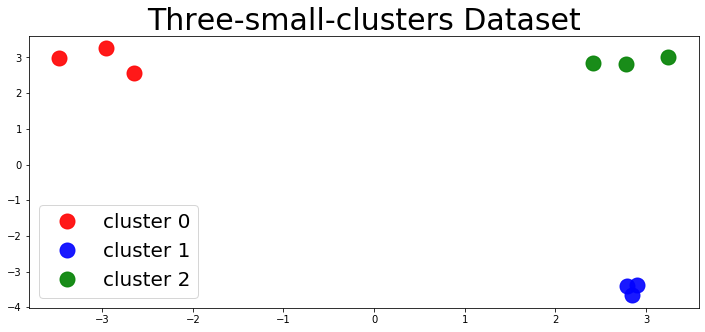

In [16]:
k = 3 # we know there are three clusters
clusters = hierarchical_clustering(X,k)

'plot dataset + cluster labels'
colors = ['red','blue','green']
plt.figure(figsize=(12,5))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',markersize=15,color=colors[i],label = 'cluster '+str(i),alpha=0.9)
    plt.legend(fontsize=20,loc='lower left')
plt.title('Three-small-clusters Dataset',fontsize=30)

#### Test 2: four-blobs dataset

Text(0.5, 1.0, 'Four-blobs Dataset')

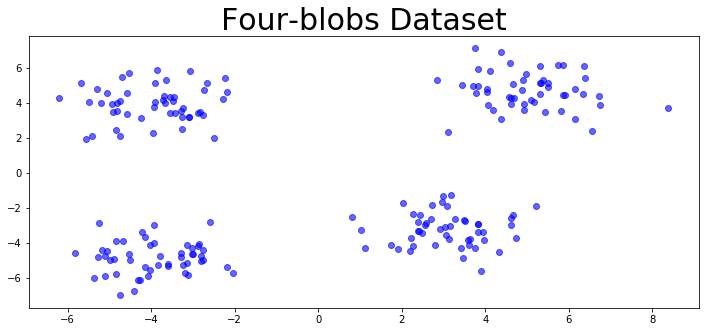

In [17]:
'four-blobs dataset'
X = np.zeros((200,2)) #2 features; 200 data points
X[0:50] = np.random.randn(50,2) + [-4,4] # blob 1
X[50:100] = np.random.randn(50,2) + [3,-3] # blob 2
X[100:150] = np.random.randn(50,2) + [5,5] # blob 3
X[150:200] = np.random.randn(50,2) + [-4,-5] # blob 4

'plot dataset'
plt.figure(figsize=(12,5))
plt.plot(X[:,0],X[:,1],'bo',alpha=0.6)
plt.title('Four-blobs Dataset',fontsize=30)

Text(0.5, 1.0, 'Four-blobs Dataset')

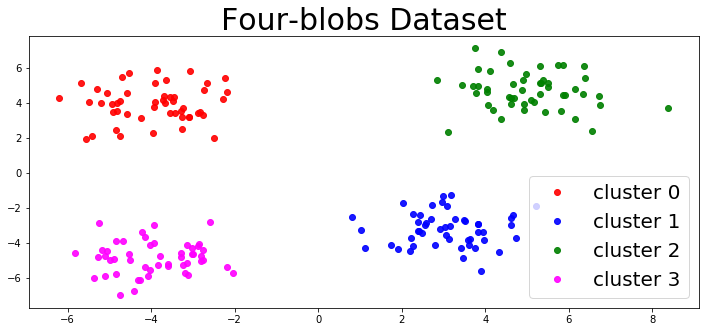

In [18]:
k = 4 # we know there are 4 clusters
clusters = hierarchical_clustering(X,k)


'plot dataset + cluster labels'
colors = ['red','blue','green','magenta']
plt.figure(figsize=(12,5))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.9)
    'plot cluster means'
    #plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20,loc='lower right')
plt.title('Four-blobs Dataset',fontsize=30)

#### Test 3: banana-shaped-clusters dataset

Text(0.5, 1.0, 'two-banana-shaped-clusters dataset')

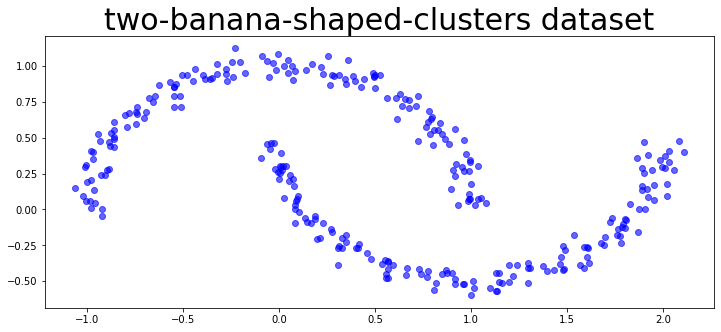

In [19]:
'generate two banana-shaped sets'
from sklearn.datasets import make_moons
X,labels = make_moons(n_samples=300,noise=0.05)
plt.figure(figsize=(12,5))
plt.plot(X[:,0],X[:,1],'o',color='blue',alpha=0.6)
plt.title('two-banana-shaped-clusters dataset',fontsize=30)

Text(0.5, 1.0, 'two-banana-shaped-clusters dataset')

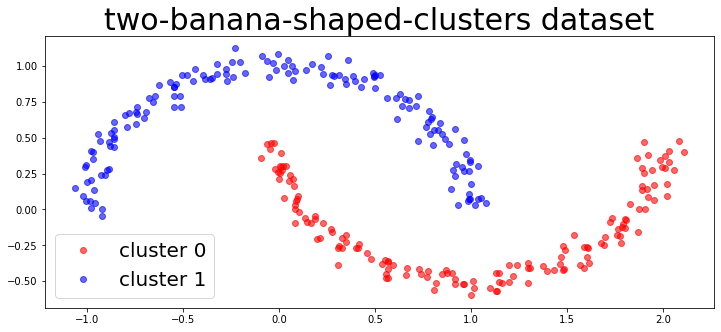

In [20]:
k = 2 # we known there are two clusters
clusters = hierarchical_clustering(X,k)

'plot dataset + cluster labels'
colors = ['red','blue']
plt.figure(figsize=(12,5))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.6)
    plt.legend(fontsize=20,loc='lower left')
plt.title('two-banana-shaped-clusters dataset',fontsize=30)

#### Test 4: ring-shaped dataset

Text(0.5, 1.0, 'ring-shaped dataset')

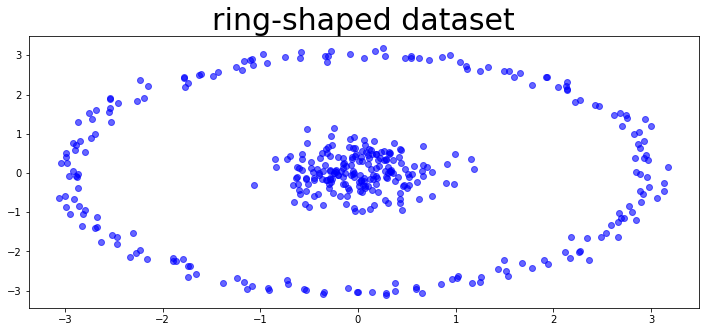

In [21]:
X = np.zeros((400,2))

# cluster 1:
theta = np.linspace(0,2*np.pi,200) 
X[0:200,0] = 3*np.sin(theta)+0.1*np.random.randn(200)
X[0:200,1] = 3*np.cos(theta)+0.1*np.random.randn(200)
# cluster 2:
X[200:400] = 0.4*np.random.randn(200,2)

plt.figure(figsize=(12,5))
plt.plot(X[:,0],X[:,1],'bo',alpha=0.6)
plt.title('ring-shaped dataset',fontsize=30)

Text(0.5, 1.0, 'ring-shaped dataset')

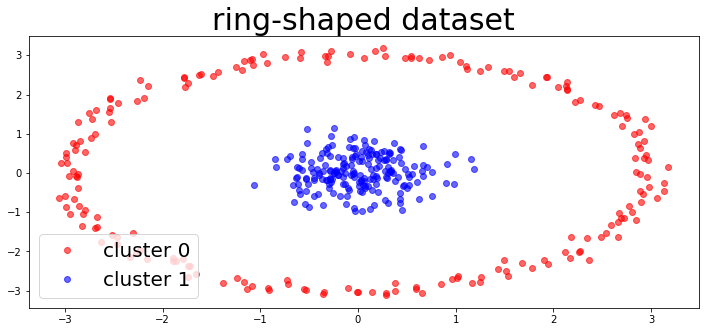

In [22]:
k = 2 # we known there are two clusters
clusters = hierarchical_clustering(X,k)

'plot dataset + cluster labels'
colors = ['red','blue']
plt.figure(figsize=(12,5))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.6)
    plt.legend(fontsize=20,loc='lower left')
plt.title('ring-shaped dataset',fontsize=30)

#### Test 5: Unevenly sized clusters

Text(0.5, 1.0, 'three-unevenly-sized-clusters dataset')

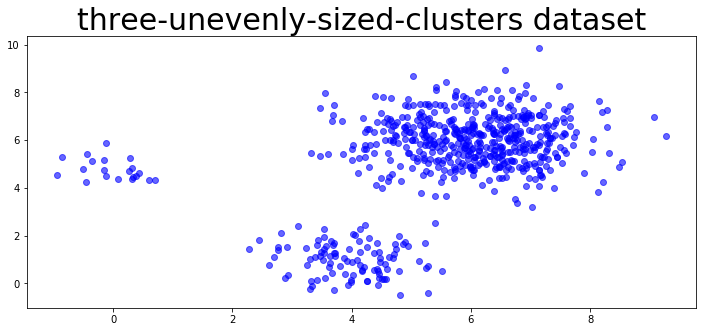

In [26]:
X = np.zeros((620,2)) 
X[0:500] = np.random.randn(500,2) + [6,6] # blob 1 (big)
X[500:600] = 0.7*np.random.randn(100,2) + [4,1] # blob 2 (medium)
X[600:620] = 0.5*np.random.randn(20,2) + [0,5] # blob 3 (small)

plt.figure(figsize=(12,5))
plt.plot(X[:,0],X[:,1],'bo',alpha=0.6)
plt.title('three-unevenly-sized-clusters dataset',fontsize=30)

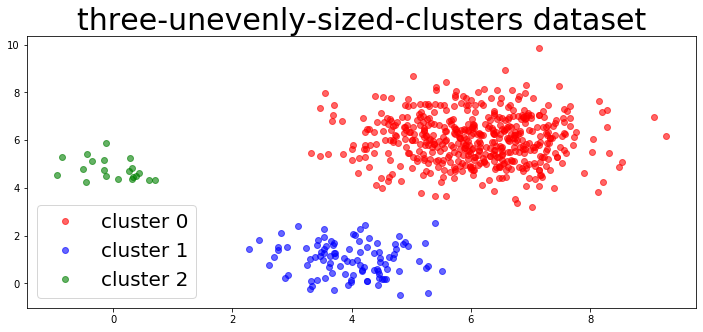

In [27]:
k = 3 # we known there are three clusters
clusters = hierarchical_clustering(X,k)

'plot dataset + cluster labels'
colors = ['red','blue','green']
plt.figure(figsize=(12,5))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.6)
    plt.legend(fontsize=20,loc='lower left')
    plt.title('three-unevenly-sized-clusters dataset',fontsize=30)

### 10.2.3 Questions/Problems (some of these problems might appear in Homework 7)

**Problem 1:** Modify the hierarchical_clustering function so that it computes (and returns) the inertia at each step.

In [28]:
def hierarchical_clustering_with_inertia(X,n_clusters=1):   
    
    m,n = X.shape #dataset size, number of features
    
    'Make each point its own cluster of one'
    k = m # number of clusters
    clusters = np.arange(k) 
    
    'distance between clusters initialization'
    distance_clusters = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            distance_clusters[i,j] = np.linalg.norm(X[i]-X[j]) # Euclidean distance between point i and point j
    np.fill_diagonal(distance_clusters, np.inf) #set diagonal entries to infinity
    
    'cluster lengths initialization'
    cluster_len = np.ones(m) # all clusters have length one
    
    'cluster centers (means) initialization'
    means = X.copy()
    
    'inertia initialization'
    inertia = np.zeros(m-n_clusters+1)
    
    'hierarchical clustering iteration'
    it = 0
    while k>n_clusters:     
        it = it+1

        'find closest clusters'
        result = np.where(distance_clusters==np.amin(distance_clusters))
        i,j = result[0][0],result[1][0]
        i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
        
        'merge clusters i and j'
        clusters[clusters==j]=i
        
        'rename clusters'
        for idx in range(j+1,k):
            clusters[clusters==idx]=idx-1
            
        'recompute distance from the new cluster i to the remaining clusters'
        distance_clusters[i] = np.minimum(distance_clusters[i],distance_clusters[j]) # STUDENTS: do you see why this is the distance from the new cluster i to the other clusters?
        distance_clusters[:,i] = distance_clusters[i] # distance_clusters matrix is symmetric
        distance_clusters[i,i]= np.inf # set the distance from cluster i to itself to infinity
            
        'remove row j and column j from distance_clusters matrix'
        distance_clusters = np.delete(distance_clusters,j,0) # remove row j
        distance_clusters = np.delete(distance_clusters,j,1) # remove column j
              
        'update number of clusters'
        k = k - 1
        
        'update cluster centers'
        means[i] = (cluster_len[i]*means[i]+cluster_len[j]*means[j])/(cluster_len[i]+cluster_len[j])
        means = np.delete(means,j,0)
        
        'update cluster lengths'
        cluster_len[i] = cluster_len[i]+cluster_len[j]
        cluster_len = np.delete(cluster_len,j)
        
        'inertia'
        inertia[it] = np.sum([np.sum(np.square(np.linalg.norm(X[clusters==cluster]-means[cluster],axis=1)))
                                for cluster in range(k)])/m

    return clusters, inertia

Let us test the hierarchical_clustering_with_inertia function

Text(0.5, 1.0, 'Four-blobs Dataset')

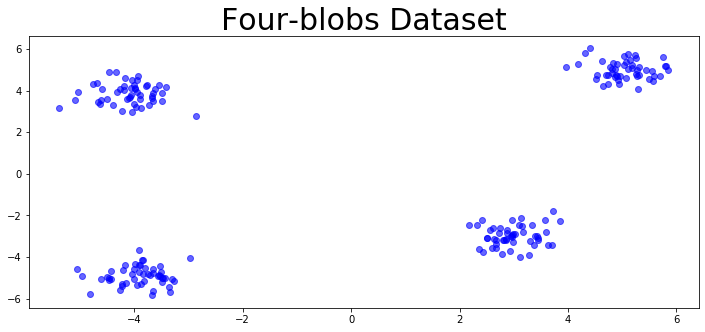

In [29]:
'four-blobs dataset'
X = np.zeros((200,2)) #2 features; 200 data points
X[0:50] = .5*np.random.randn(50,2) + [-4,4] # blob 1
X[50:100] = 0.5*np.random.randn(50,2) + [3,-3] # blob 2
X[100:150] = 0.5*np.random.randn(50,2) + [5,5] # blob 3
X[150:200] = 0.5*np.random.randn(50,2) + [-4,-5] # blob 4

'plot dataset'
plt.figure(figsize=(12,5))
plt.plot(X[:,0],X[:,1],'bo',alpha=0.6)
plt.title('Four-blobs Dataset',fontsize=30)

In [30]:
clusters, inertia = hierarchical_clustering_with_inertia(X)

Let us plot the inertia as a function of the iteration

Text(0, 0.5, 'inertia')

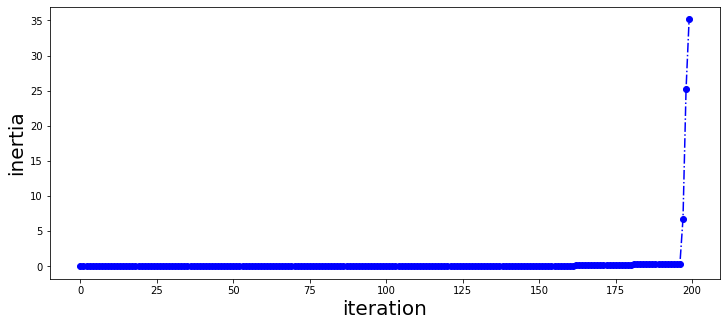

In [31]:
iterations = np.arange(X.shape[0])

plt.figure(figsize=(12,5))
plt.plot(iterations,inertia,'bo-.')
plt.xlabel('iteration',fontsize=20)
plt.ylabel('inertia',fontsize=20)

If we plot the last 10 inertia values, the "elbow" is easier to see.

Text(0, 0.5, 'inertia')

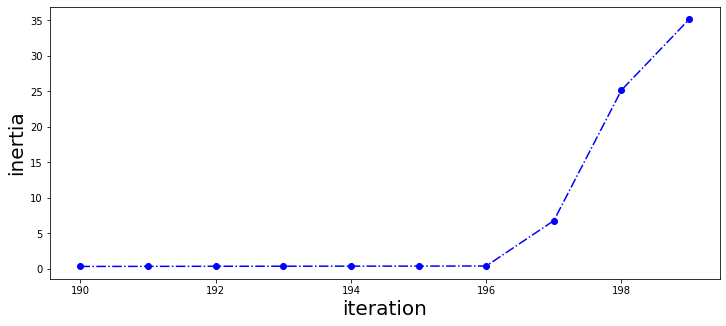

In [32]:
plt.figure(figsize=(12,5))
plt.plot(iterations[190:],inertia[190:],'bo-.')
plt.xlabel('iteration',fontsize=20)
plt.ylabel('inertia',fontsize=20)

As you can see, there is an "elbow" at iteration = 196, which corresponds to k=4 clusters.

**An alternative to inertia:** Using the inertia for choosing the best value for the number of clusters is rather coarse. 
A more precise approach (but also more computationally expensive) is to use the **silhouette score**

The **silhouette score** is the mean **silhouette coefficient** over all the dataset points.

For a datapont $x_i$ in cluster $C_i$, its **silhouette coefficient** is computed as follows.
First, we need to compute its mean distance to the other points in the same cluster:

$$
a = \frac{1}{\mbox{size cluster $C_i$ - 1}}\sum_{x_j\in C_i}\mathrm{distance}\,(x_i,x_j).
$$

We divide by $\mbox{size cluster $C_i$ - 1}$ because we do not include the distance from $x_i$ to itself.
Secondly, we compute the mean distance to the points of the next closest cluster:

$$
b = \min_{C_k\neq C_i}\left\{ \frac{1}{\mbox{size cluster $C_k$}}\sum_{x_j\in C_k}\mathrm{distance}\,(x_i,x_j)\right\}.
$$

The **silhouette coefficient** of $x_i$ is

$$
s = \left\{
\begin{array}{ll}
\dfrac{b-a}{\max\{a,b\}} & \mbox{ if size of $C_i$ is not equal to 1}, \\
0 & \mbox{ if size of $C_i$ is equal to 1}
\end{array}
\right.
$$

The **silhouette coefficient**  can vary between -1 and 1. 
A coefficient close to 1 means that the point is well inside its own cluster and far from other clusters. A coefficient close to 0 means that it is close to a cluster boundary. A coefficient close to -1 means that the point may have been assigned to the wrong cluster.

In [37]:
def hierarchical_clustering_with_s_score(X,n_clusters=1):   
    'it also returns the silhouette scores'
    
    m,n = X.shape #dataset size, number of features
    
    'Make each point its own cluster of one'
    k = m # number of clusters
    clusters = np.arange(k) 
    
    'distance between clusters initialization'
    distance_clusters = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            distance_clusters[i,j] = np.linalg.norm(X[i]-X[j]) # Euclidean distance between point i and point j
    'distance between points'
    d = distance_clusters.copy()
    np.fill_diagonal(distance_clusters, np.inf) #set diagonal entries to infinity
    
    'cluster lengths initialization'
    cluster_len = np.ones(m) # all clusters have length one
    
    's_scores initialization'
    s_scores = np.zeros(m-n_clusters+1)
    
    'hierarchical clustering iteration'
    it = 0
    while k>n_clusters:     
        it = it+1

        'find closest clusters'
        result = np.where(distance_clusters==np.amin(distance_clusters))
        i,j = result[0][0],result[1][0]
        i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i
        
        'merge clusters i and j'
        clusters[clusters==j]=i
        
        'rename clusters'
        for idx in range(j+1,k):
            clusters[clusters==idx]=idx-1
            
        'recompute distance from the new cluster i to the remaining clusters'
        distance_clusters[i] = np.minimum(distance_clusters[i],distance_clusters[j]) # STUDENTS: do you see why this is the distance from the new cluster i to the other clusters?
        distance_clusters[:,i] = distance_clusters[i] # distance_clusters matrix is symmetric
        distance_clusters[i,i]= np.inf # set the distance from cluster i to itself to infinity
            
        'remove row j and column j from distance_clusters matrix'
        distance_clusters = np.delete(distance_clusters,j,0) # remove row j
        distance_clusters = np.delete(distance_clusters,j,1) # remove column j
              
        'update number of clusters'
        k = k - 1
        
        'update cluster lengths'
        cluster_len[i] = cluster_len[i]+cluster_len[j]
        cluster_len = np.delete(cluster_len,j)
        
        'silhouette coefficients'
        a = np.array([np.sum(d[clusters == clusters[i],i])/(cluster_len[clusters[i]]-1) 
                      if cluster_len[clusters[i]]>1 
                          else 0
                              for i in range(m)])
        if k!=1:
            b = np.array([np.min([np.mean(d[clusters == cluster,i]) for cluster in range(k) 
                                                                      if cluster != clusters[i]]) 
                                                                          for i in range(m)])
        else: #only one cluster
            b = np.zeros(m)
        s_coeff = np.array([(b[i]-a[i])/max(a[i],b[i]) if cluster_len[clusters[i]]>1
                                                            else 0
                                                                for i in range(m)]) # warning: it could happen that a=b=0
        s_scores[it] = np.mean(s_coeff)
    return clusters, s_scores

Let us test the hierarchical_clustering_with_s_score function:

In [34]:
clusters, s_scores = hierarchical_clustering_with_s_score(X)

Text(0, 0.5, 'silhouette scores')

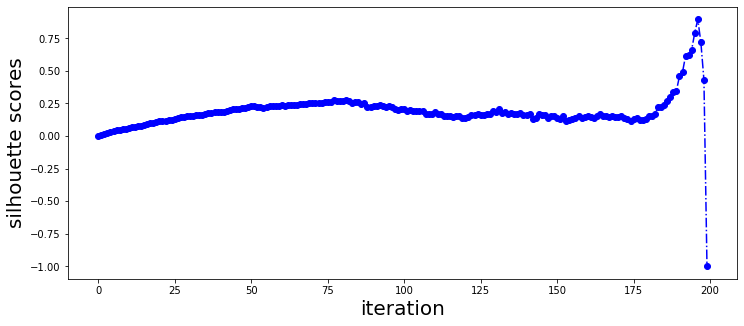

In [35]:
iterations = np.arange(X.shape[0])

plt.figure(figsize=(12,5))
plt.plot(iterations,s_scores,'bo-.')
plt.xlabel('iteration',fontsize=20)
plt.ylabel('silhouette scores',fontsize=20)

As you can see, the visualization confirms that iteration = 196 (k=4 clusters) is a very good choice (it has the largest silhouette score).

Text(0, 0.5, 'silhouette scores')

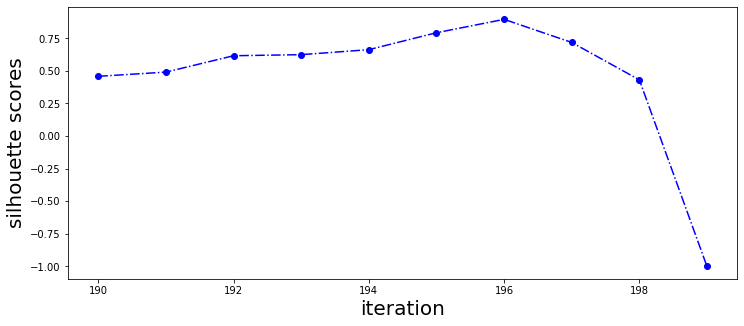

In [36]:
iterations = np.arange(X.shape[0])

plt.figure(figsize=(12,5))
plt.plot(iterations[190:],s_scores[190:],'bo-.')
plt.xlabel('iteration',fontsize=20)
plt.ylabel('silhouette scores',fontsize=20)

**Problem 2**: Write a hierarchical_clustering function that computes the intercluster distance using 

   **(a)** the average distance between two points in each cluster.
   
   **(b)** the distance between cluster centers